# 02c AtBot ML Complete Data -- (coi1 dropped)

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import pickle 
import time 

from scipy import stats

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

from collections import Counter

import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
from atbotml.custom_fuctions import *

## Notebook parameters

In [3]:
nb_id = '02c'
num_classes = 10
random_state = 42

## Load data

In [4]:
df = pd.read_pickle("./01_AtBot_data.pkl")
print("Number of data samples:", len(df))
print("Number of features:", len(df.columns)-6)

f = open('01_AtDefenseGeneList.pkl', 'rb')
defense_list = pickle.load(f)
f.close()
print("Number of defense genes:", len(defense_list))

# extract feature names from RNASeq data
gene_names = list(df)[6:29107]

Number of data samples: 1092
Number of features: 29101
Number of defense genes: 130


### Drop coi1 plant type

In [5]:
df = df.loc[df['HostGenoType'] != 'coi1']
df

,Index,LibraryID,HostGenoType,Sample,Isolate,Lesion,AT1G01010,AT1G01040,AT1G01046,AT1G01050,...,BCIN18G00020,BCIN18G00060,BCIN18G00145,BCIN18G00180,BCIN18G00190,EFBCT00000013145,EFBCT00000013262,EFBCT00000013292,ENSRNA049512921.T1,ENSRNA049513883.T1
367,col0_1,col.0.G1F.1,col0,1,1.01.01,14.454036,14.997401,0.000000,0.000000,29.713161,...,0.0,0.000000,0.000000,0.000000,0.000000,67.788087,0.000000,0.000000,0.000000,0.000000
368,col0_1,col.0.G2E.1,col0,1,1.01.01,14.454036,16.395521,0.142250,0.000000,59.277996,...,0.0,0.000000,0.000000,0.000000,0.000000,23.859508,0.000000,19.787230,1.855906,3.711811
369,col0_1,col.0.G1E.1,col0,1,1.01.01,14.454036,14.817997,0.000000,0.000000,70.458533,...,0.0,0.000000,0.000000,0.000000,0.000000,31.775116,0.000000,0.000000,0.000000,0.000000
370,col0_1,col.0.G2F.1,col0,1,1.01.01,14.454036,21.409733,0.000000,0.000000,74.987913,...,0.0,0.000000,0.000000,0.000000,0.000000,81.534417,0.000000,78.294917,3.671762,0.000000
371,col0_10,col.0.G2E.10,col0,10,1.02.04,13.567087,12.662070,0.000000,0.000000,64.507768,...,0.0,9.914628,6.118209,0.000000,41.644696,24.970905,0.000000,41.417874,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,npr1_97,npr.1.G1F.972,npr1,97,1.05.16,20.747628,4.210585,0.226497,0.000000,88.664582,...,0.0,4.623277,12.227030,3.334425,16.953341,12.097817,0.000000,13.795366,0.000000,0.000000
1088,npr1_97,npr.1.G2E.971,npr1,97,1.05.16,20.747628,3.895372,0.000000,0.000000,18.900222,...,0.0,5.101576,16.951453,7.924833,14.651827,48.519908,11.222415,24.590291,1.537600,0.000000
1089,npr1_97,npr.1.G2E.972,npr1,97,1.05.16,20.747628,7.494782,0.000000,0.000000,14.318503,...,0.0,7.547289,19.236880,3.313311,15.314539,42.074248,18.768019,27.416028,0.642859,3.857151
1090,npr1_97,npr.1.G2F.971,npr1,97,1.05.16,20.747628,1.965208,0.000000,0.000000,23.361068,...,0.0,1.803102,16.690115,4.551550,37.868097,132.109896,103.127734,0.000000,0.000000,0.000000


## Direct standardize class labelling

count    725.000000
mean      18.961926
std        7.799295
min        3.169601
25%       13.439529
50%       18.097083
75%       22.800279
max       40.387241
Name: Lesion, dtype: float64

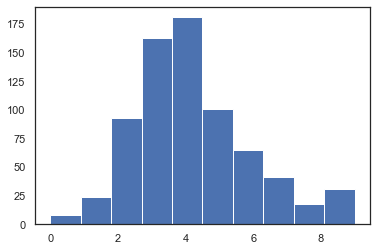

In [6]:
y_class, df_lesion, df_lesion_summary = direct_standardize_labelling(df, num_classes, min_zero=True)

plt.hist(y_class, bins=num_classes)
df_lesion_summary

## Full Data
### Data preprocessing

X: (725, 29101)
y: DescribeResult(nobs=725, minmax=(0.0, 9.0), mean=4.176551724137931, variance=3.659394170318156, skewness=0.6477677410641876, kurtosis=0.23026849067895716)

x_train: (507, 29101)
x_test: (218, 29101)
y_train_class: DescribeResult(nobs=507, minmax=(0.0, 9.0), mean=4.209072978303747, variance=3.7467159373513885, skewness=0.6247223104414811, kurtosis=0.25630876284485105)
y_test_class: DescribeResult(nobs=218, minmax=(0.0, 9.0), mean=4.10091743119266, variance=3.464423117574938, skewness=0.6992282924250768, kurtosis=0.14363506454390507)

Oversampled training data: 1300



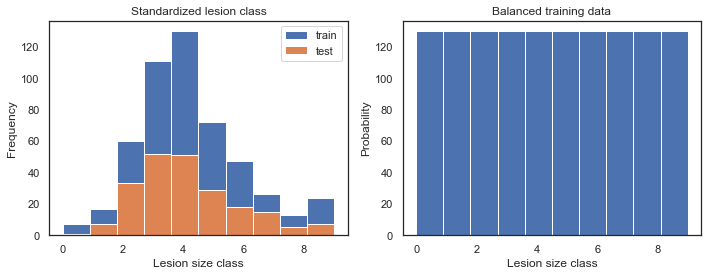

In [7]:
X_train, X_test, y_train, y_test, scaler = preprocess_AtBotData(df, standardize_label_func=direct_standardize_labelling, 
                                                                num_classes=num_classes, verbose="Info",
                                                                show_figure=True,
                                                                nb_id=nb_id, random_state=random_state)

### DNN

Classification accuracy is almost universally inappropriate for imbalanced classification.

For imbalanced classification problems, the *majority class* is typically referred to as the negative outcome (e.g. such as “no change” or “negative test result“), and the *minority class* is typically referred to as the positive outcome (e.g. “change” or “positive test result“).

**Sensitivity-Specificity Metrics** <br>
Sensitivity = TruePositive / (TruePositive + FalseNegative) *<br>
Specificity = TrueNegative / (FalsePositive + TrueNegative) <br>
G-Mean = sqrt(Sensitivity * Specificity)<br>




**Precision-Recall Metrics**<br>
Precision = TruePositive / (TruePositive + FalsePositive)<br>
Recall = TruePositive / (TruePositive + FalseNegative)<br>
F-Measure = (2 * Precision * Recall) / (Precision + Recall) *

In [8]:
model, history = train_dnn_1layer(X_train, y_train, X_test, y_test, num_classes, epochs=50)

2021-10-20 12:16:51.447456: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-20 12:16:51.447741: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-20 12:16:51.556770: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Save model

Accuracy:	 27.52%
Precision:	 26.66%
Recall:		 27.44%
F1 score:	 23.71%

 Adjacency


{'Accuracy': 0.6330275229357798,
 'Precision': 0.569982028216661,
 'Recall': 0.4724259231865722,
 'F1 Score': 0.47136098840999285}

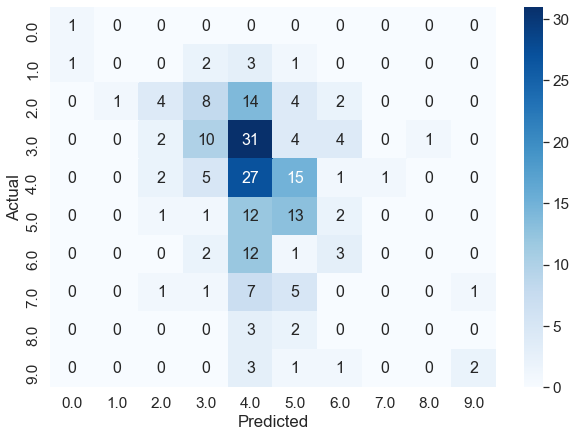

In [13]:
predictions = model.predict(X_test)
dnn_y_pred = np.argmax(predictions, 1)
dnn_score = get_sk_metrics(y_test, dnn_y_pred, verbose=1)
dnn_cm = plot_confusion_matrix(y_test, dnn_y_pred)
dnn_adj_scores = get_fuzzy_average_score(dnn_cm)

print('\n Adjacency')
dnn_adj_scores

Accuracy:	 28.44%
Precision:	 30.24%
Recall:		 24.20%
F1 score:	 22.50%


/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO:tensorflow:Assets written to: ./models/02c_dnn_model/assets


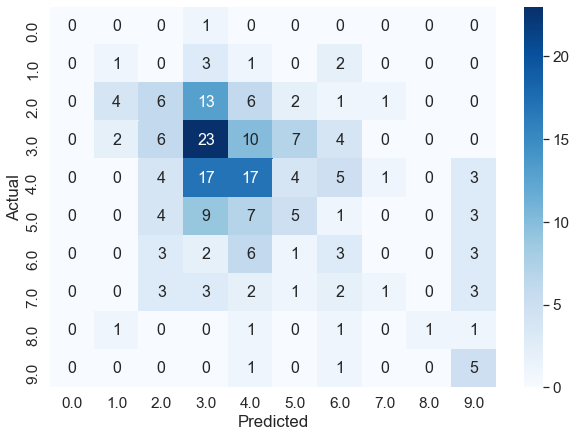

In [8]:
# predictions = model.predict(X_test)
# dnn_y_pred = np.argmax(predictions, 1)
# dnn_score = get_sk_metrics(y_test, dnn_y_pred)
# dnn_cm = plot_confusion_matrix(y_test, dnn_y_pred)
#
# # save the keras model and results
# filename = './models/' + nb_id + '_dnn_model'
# model.save(filename)
#
# filename = './models/' + nb_id + '_dnn_results.pkl'
# pickle.dump([history.history, dnn_score, dnn_cm], open(filename, 'wb'))

#### Load DNN model and results

/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:	 28.44%
Precision:	 30.24%
Recall:		 24.20%
F1 score:	 22.50%


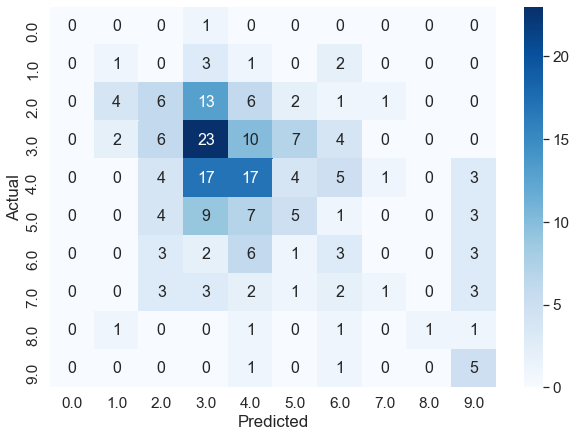

In [9]:
# load model and results
filename = './models/' + nb_id + '_dnn_model'
model = keras.models.load_model(filename)

filename = './models/' + nb_id + '_dnn_results.pkl'
history, dnn_score, dnn_cm = pickle.load(open(filename,'rb'))

predictions = model.predict(X_test)
dnn_y_pred = np.argmax(predictions, 1)
dnn_score = get_sk_metrics(y_test, dnn_y_pred)
dnn_cm = plot_confusion_matrix(y_test, dnn_y_pred)

### XGBoost
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [14]:
xgb = XGBClassifier()

t0 = time.time()
xgb.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
elapsed time: 2.89 mins



In [ ]:
# predictions = model.predict(X_test)
# dnn_y_pred = np.argmax(predictions, 1)
# dnn_score = get_sk_metrics(y_test, dnn_y_pred, verbose=1)
# dnn_cm = plot_confusion_matrix(y_test, dnn_y_pred)
# dnn_adj_scores = get_fuzzy_average_score(dnn_cm)
#
# print('\n Adjacency')
# dnn_adj_scores

Accuracy:	 29.36%
Precision:	 20.80%
Recall:		 19.11%
F1 score:	 19.43%

 Adjacency


{'Accuracy': 0.6284403669724771,
 'Precision': 0.48857976314872864,
 'Recall': 0.4346284153079284,
 'F1 Score': 0.42618682135304076}

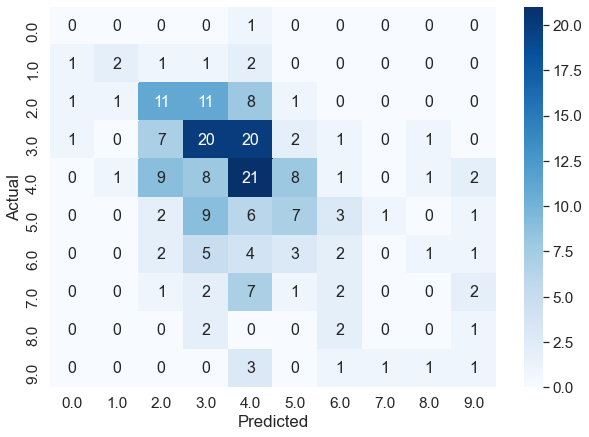

In [16]:
xgb_y_pred = xgb.predict(X_test)
xgb_score = get_sk_metrics(y_test, xgb_y_pred, average='macro', verbose=1)
xgb_cm = plot_confusion_matrix(y_test, xgb_y_pred)
xgb_adj_scores = get_fuzzy_average_score(xgb_cm)

print('\n Adjacency')
xgb_adj_scores

Accuracy:	 31.65%
Precision:	 27.21%
Recall:		 35.40%
F1 score:	 29.06%


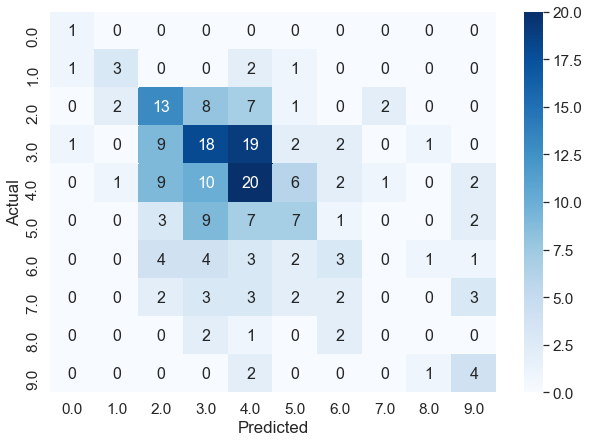

In [11]:
xgb_y_pred = xgb.predict(X_test)
xgb_score = get_sk_metrics(y_test, xgb_y_pred, average='macro')
xgb_cm = plot_confusion_matrix(y_test, xgb_y_pred)

filename = './models/' + nb_id + '_xgb_model_results.pkl'
pickle.dump([xgb, xgb_score, xgb_cm], open(filename, 'wb'))

#### Load XGBoost model and results

Accuracy:	 31.65%
Precision:	 27.21%
Recall:		 35.40%
F1 score:	 29.06%


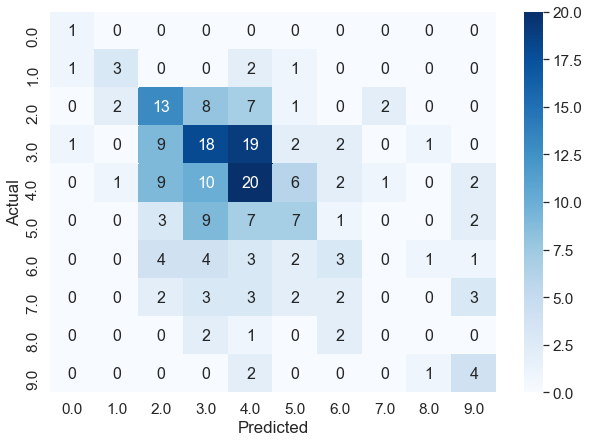

In [12]:
filename = './models/' + nb_id + '_xgb_model_results.pkl'
xgb, xgb_score, xgb_cm = pickle.load(open(filename,'rb'))

xgb_y_pred = xgb.predict(X_test)
xgb_score = get_sk_metrics(y_test, xgb_y_pred, average='macro')
xgb_cm = plot_confusion_matrix(y_test, xgb_y_pred)

### Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)

t0 = time.time()
rf.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

elapsed time: 0.16 mins



Accuracy:	 30.73%
Precision:	 32.19%
Recall:		 26.19%
F1 score:	 24.32%


../atbotml/custom_fuctions.py:312: RuntimeWarning: invalid value encountered in long_scalars
  fuzzy_precision[i] = np.sum(cmT[i, min_idx:max_idx + 1]) / np.sum(cmT[i])


{'Accuracy': 0.6605504587155964,
 'Precision': 0.5917167413072035,
 'Recall': 0.5898741578457604,
 'F1 Score': 0.49460934597549144}

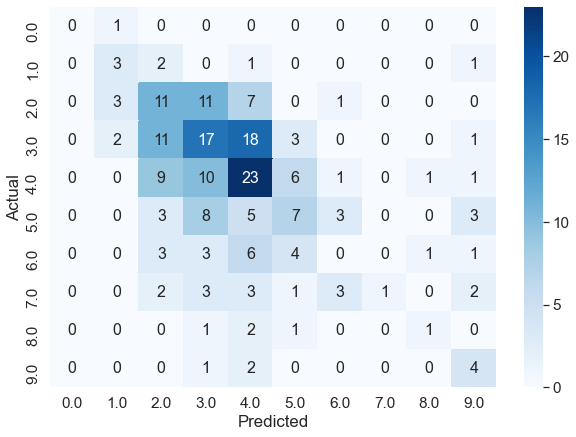

In [20]:
rf_y_pred = rf.predict(X_test)
rf_score = get_sk_metrics(y_test, rf_y_pred, average='macro', verbose=1)
rf_cm = plot_confusion_matrix(y_test, rf_y_pred)
rf_adj_scores = get_fuzzy_average_score(rf_cm)

rf_adj_scores

Accuracy:	 29.36%
Precision:	 29.89%
Recall:		 33.96%
F1 score:	 31.24%


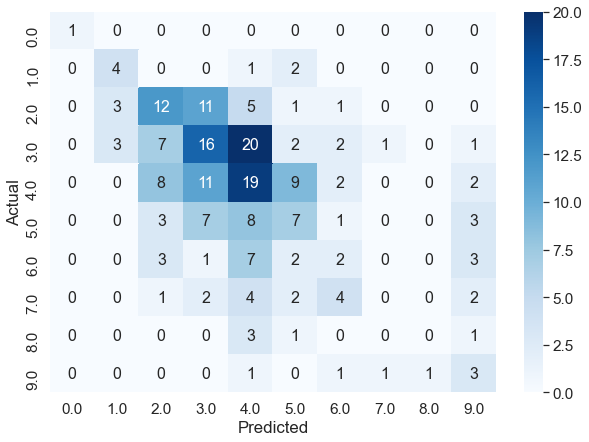

In [14]:
rf_y_pred = rf.predict(X_test)
rf_score = get_sk_metrics(y_test, rf_y_pred, average='macro')
rf_cm = plot_confusion_matrix(y_test, rf_y_pred)

filename = './models/' + nb_id + '_rf_model_results.pkl'
pickle.dump([rf, rf_score, rf_cm], open(filename, 'wb'))

#### Load RF model and results

Accuracy:	 29.36%
Precision:	 29.89%
Recall:		 33.96%
F1 score:	 31.24%


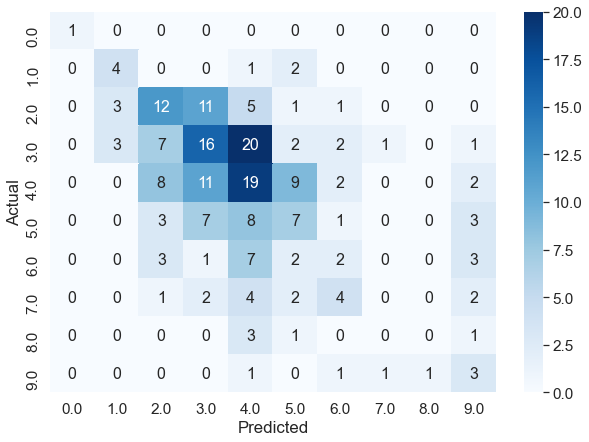

In [15]:
filename = './models/' + nb_id + '_rf_model_results.pkl'
rf, rf_score, rf_cm = pickle.load(open(filename,'rb'))

rf_y_pred = rf.predict(X_test)
rf_score = get_sk_metrics(y_test, rf_y_pred, average='macro')
rf_cm = plot_confusion_matrix(y_test, rf_y_pred)

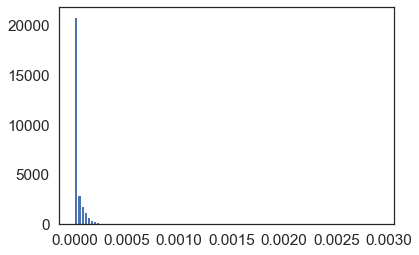

(29101,)

In [16]:
sns.set_style("white")

stats.describe(rf.feature_importances_)
plt.hist(rf.feature_importances_,bins=100)
plt.show()
rf.feature_importances_.shape

In [17]:
df_rf = pd.DataFrame({'gene': gene_names, 'importance': rf.feature_importances_})
df_rf_sorted = df_rf.sort_values(by=['importance'],ascending=False)

print("Top 10 genes by importance")
df_rf_sorted.head(10)

Top 10 genes by importance


,gene,importance
24826,BCIN07G06220,0.002905
24094,BCIN06G03440,0.002476
22909,BCIN04G03330,0.002463
21060,BCIN01G09280,0.002297
22053,BCIN03G01030,0.002241
21017,BCIN01G08740,0.002172
4725,AT1G73340,0.001973
20433,BCIN01G01180,0.001969
28082,BCIN14G02370,0.001783
24030,BCIN06G02560,0.001654


### SVM
#### RBF kernel

In [18]:
#Create a svm Classifier
svm = SVC() 

t0 = time.time()
svm.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

elapsed time: 0.88 mins



/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:	 29.82%
Precision:	 19.81%
Recall:		 18.06%
F1 score:	 17.10%


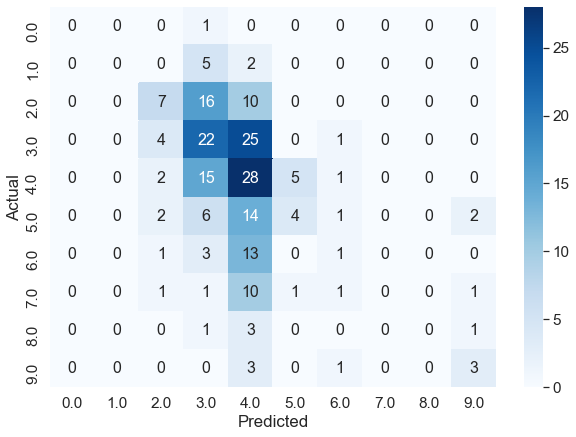

In [19]:
#Predict the response for test dataset
svm_y_pred = svm.predict(X_test)
svm_score = get_sk_metrics(y_test, svm_y_pred, average='macro')
svm_cm = plot_confusion_matrix(y_test, svm_y_pred)

filename = './models/' + nb_id + '_svm_model_results.pkl'
pickle.dump([svm, svm_score, svm_cm], open(filename, 'wb'))

##### Load SVM model and results

/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:	 29.82%
Precision:	 19.81%
Recall:		 18.06%
F1 score:	 17.10%


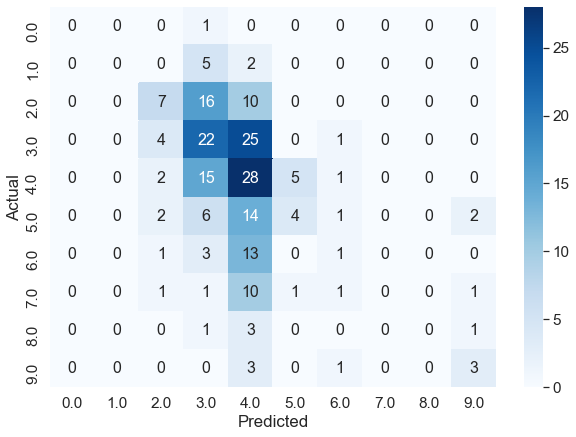

In [20]:
filename = './models/' + nb_id + '_svm_model_results.pkl'
svm, svm_score, svm_cm = pickle.load(open(filename,'rb'))

svm_y_pred = svm.predict(X_test)
svm_score = get_sk_metrics(y_test, svm_y_pred, average='macro')
svm_cm = plot_confusion_matrix(y_test, svm_y_pred)

#### Linear kernel

In [21]:
from sklearn.svm import SVC

#Create a svm Classifier
svm_lin = SVC(kernel='linear') # Linear Kernel

t0 = time.time()
#Train the model using the training sets
svm_lin.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

elapsed time: 0.58 mins



/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:	 36.24%
Precision:	 28.39%
Recall:		 25.04%
F1 score:	 24.08%


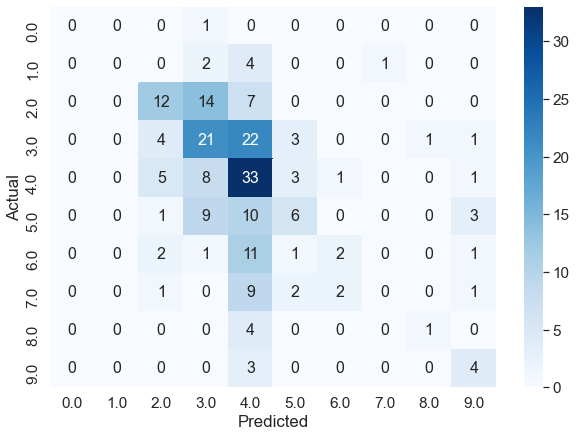

In [22]:
svm_lin_y_pred = svm_lin.predict(X_test)
svm_lin_score = get_sk_metrics(y_test, svm_lin_y_pred, average='macro')
svm_lin_cm = plot_confusion_matrix(y_test, svm_lin_y_pred)

filename = './models/' + nb_id + '_svm_lin_model_results.pkl'
pickle.dump([svm_lin, svm_lin_score, svm_lin_cm], open(filename, 'wb'))

##### Load SVM (linear) model and results

/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:	 36.24%
Precision:	 28.39%
Recall:		 25.04%
F1 score:	 24.08%


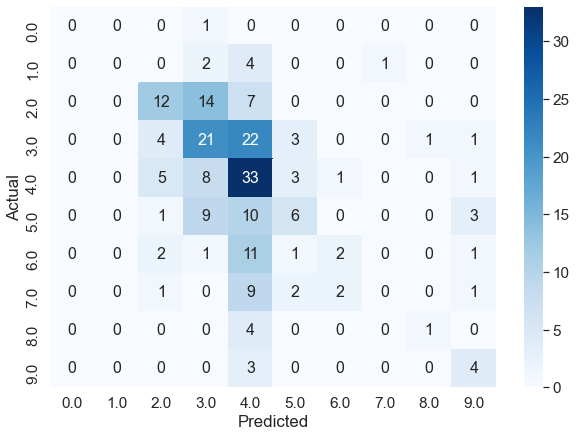

In [23]:
filename = './models/' + nb_id + '_svm_lin_model_results.pkl'
svm_lin, svm_lin_score, svm_lin_cm = pickle.load(open(filename,'rb'))

svm_lin_y_pred = svm_lin.predict(X_test)
svm_lin_score = get_sk_metrics(y_test, svm_lin_y_pred, average='macro')
svm_lin_cm = plot_confusion_matrix(y_test, svm_lin_y_pred)

## Domain Knowledge
### Defense List

In [24]:
# print("Number of defense genes:", len(defense_list))
# X_train, X_test, y_train, y_test = preprocess_AtBotData(df, standardize_label_func=direct_standardize_labelling, features_filter=defense_list, 
#                                                         num_classes=num_classes, verbose="Info", show_figure=True, nb_id=nb_id)
# X_train.shape

#### DNN

In [25]:
# model, history = train_dnn_1layer(X_train, y_train, X_test, y_test, num_classes, epochs=50)

In [26]:
# predictions = model.predict(X_test)
# dnn_def_y_pred = np.argmax(predictions, 1)
# dnn_def_score = get_sk_metrics(y_test, dnn_def_y_pred)
# dnn_def_cm = plot_confusion_matrix(y_test, dnn_def_y_pred)

# # save the keras model and results
# filename = './models/' + nb_id + '_def_dnn_model'
# model.save(filename)

# filename = './models/' + nb_id + '_def_dnn_results.pkl'
# pickle.dump([history.history, dnn_def_score, dnn_def_cm], open(filename, 'wb'))

##### Load DNN model and results

In [27]:
# # load model and results
# filename = './models/' + nb_id + '_def_dnn_model'
# model = keras.models.load_model(filename)

# filename = './models/' + nb_id + '_def_dnn_results.pkl'
# history, dnn_score, dnn_cm = pickle.load(open(filename,'rb'))

# predictions = model.predict(X_test)
# dnn_def_y_pred = np.argmax(predictions, 1)
# dnn_def_score = get_sk_metrics(y_test, dnn_def_y_pred)
# dnn_def_cm = plot_confusion_matrix(y_test, dnn_def_y_pred)

In [28]:
# plt.plot(history['sparse_categorical_accuracy'])
# plt.plot(history['val_sparse_categorical_accuracy'])
# plt.xlabel('Epochs')
# plt.ylabel('Train/Test accuracy')
# plt.legend(['Train','Test'])

## Plots

Saving to ./figures/02c_AtBot_score_class10.pdf



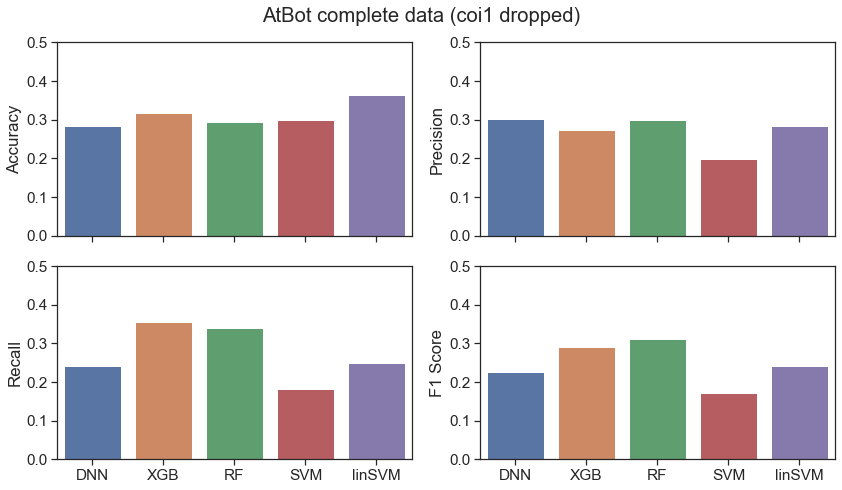

,Accuracy,Precision,Recall,F1 Score
DNN,0.284404,0.302416,0.242035,0.225046
XGB,0.316514,0.272083,0.354030,0.290620
RF,0.293578,0.298876,0.339637,0.312443
SVM,0.298165,0.198055,0.180628,0.170989
linSVM,0.362385,0.283902,0.250398,0.240805


In [30]:
max_ylim = 0.5
file_out = f'./figures/{nb_id}_AtBot_score_class{num_classes}.pdf'
fig_title = 'AtBot complete data (coi1 dropped)'
df_metrics = plot_performance_metrics(nb_id, max_ylim, file_out, fig_title)
df_metrics

In [31]:
# max_ylim = 65
# file_out = './figures/' + nb_id + '_AtBotComplete_score_stdlabel.pdf'
# fig_title = 'AtBot complete data (Standardized label)'
# df_metrics = plot_performance_metrics(nb_id, max_ylim, file_out, fig_title)
# df_metrics

../atbotml/custom_fuctions.py:245: RuntimeWarning: invalid value encountered in long_scalars
  fuzzy_precision[i] = np.sum(cmT[i, min_idx:max_idx + 1]) / np.sum(cmT[i])


Saving to ./figures/02c_AtBot_fuzzy_score_class10.pdf



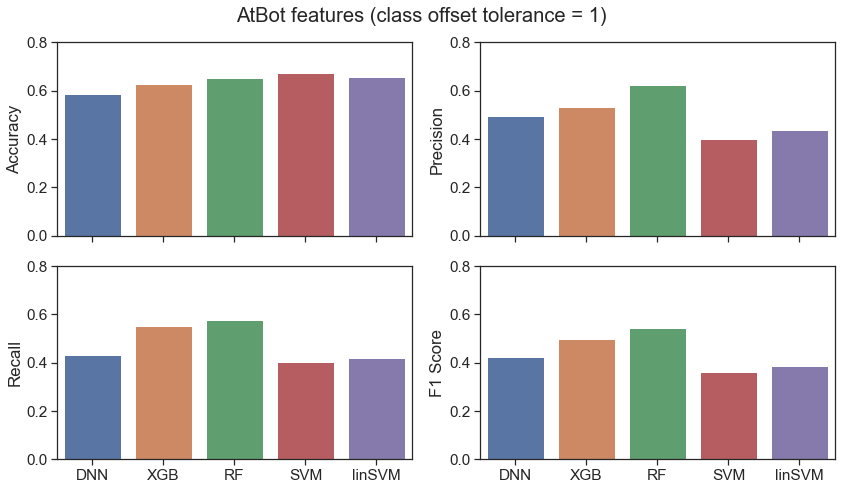

,Accuracy,Precision,Recall,F1 Score
DNN,0.587156,0.496635,0.431971,0.424385
XGB,0.628440,0.531637,0.550153,0.497707
RF,0.651376,0.623910,0.576298,0.544373
SVM,0.674312,0.399600,0.402488,0.362159
linSVM,0.655963,0.436923,0.417762,0.387534


In [32]:
max_ylim = 0.8
offset = 1
file_out = f'./figures/{nb_id}_AtBot_fuzzy_score_class{num_classes}.pdf'
fig_title = f'AtBot features (class offset tolerance = {offset})'
df_metrics = plot_performance_metrics(nb_id, max_ylim, file_out, fig_title, offset)
df_metrics

In [33]:
total_class_mse, class_mse, class_rss = class_error(dnn_cm)
total_class_mse

4.2110091743119265

Saving to ./figures/02c_AtBot_mse_class10.pdf



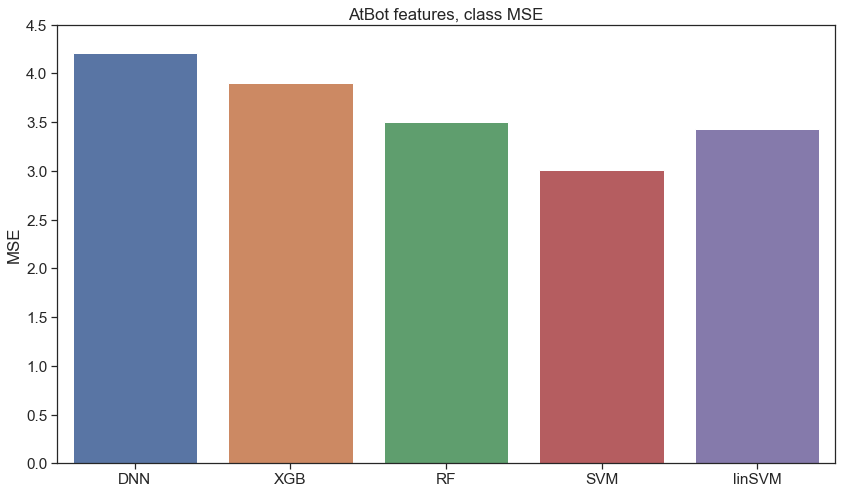

,MSE
DNN,4.211009
XGB,3.899083
RF,3.500000
SVM,3.004587
linSVM,3.426606


In [35]:
max_ylim = 4.5
file_out = f'./figures/{nb_id}_AtBot_mse_class{num_classes}.pdf'
fig_title = f'AtBot features, class MSE'
df_metrics = plot_mse(nb_id, max_ylim, file_out, fig_title)
df_metrics

### Plot performance metrics

# Others

In [ ]:
# # extract data from plot
# data = ax.get_lines()[0].get_xydata()